In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [9]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [10]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
# Fill null vlaues-train data
train_data['Gender'].fillna('Nil',inplace = True)
train_data['Married'].fillna('Nil',inplace = True)
train_data['Dependents'].fillna('Nil',inplace = True)
train_data['Self_Employed'].fillna('Nil',inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(),inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].median(),inplace = True)

In [15]:
# Fill null values-test data
test_data['Gender'].fillna('Nil',inplace = True)
test_data['Dependents'].fillna('Nil',inplace = True)
test_data['Self_Employed'].fillna('Nil',inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(),inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].median(),inplace = True)

In [16]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [18]:
numeric = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
category = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [19]:
# Scaling
scaler = StandardScaler()
for i in numeric:
    train_data[i] = scaler.fit_transform(train_data[i].values.reshape(-1,1))
    test_data[i] = scaler.fit_transform(test_data[i].values.reshape(-1,1))

In [20]:
#OneHotEncoding
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(train_data[category])
onehotlabel_tr = enc.transform(train_data[category]).toarray()
onehotlabel_test = enc.transform(test_data[category]).toarray()
df1 = pd.DataFrame(data=onehotlabel_tr)
df2 = pd.DataFrame(data=onehotlabel_test)
for i in category:
    train_data.drop(i, axis=1, inplace=True)
    test_data.drop(i, axis=1, inplace=True)

train_data = pd.concat([train_data, df1], axis=1)
test_data = pd.concat([test_data, df2], axis=1)

In [21]:
# Label encoding Loan_Status
label_encoder = preprocessing.LabelEncoder()
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

In [22]:
train_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2,...,9,10,11,12,13,14,15,16,17,18
0,LP001002,0.072991,-0.554487,-0.211241,0.273231,0.411733,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,LP001003,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,LP001005,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,-0.462062,0.251980,-0.306435,0.273231,0.411733,1,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,LP001008,0.097728,-0.554487,-0.056551,0.273231,0.411733,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [23]:
#droping Loan_id
train_data.drop('Loan_ID', axis=1, inplace=True)
Loan_ID = test_data['Loan_ID']
test_data.drop('Loan_ID', axis=1, inplace=True)

In [24]:
train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2,3,...,9,10,11,12,13,14,15,16,17,18
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,0.186461,-0.673335,-0.426780,0.266022,0.437674,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.352692,-0.029848,-0.163953,0.266022,0.437674,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.039641,0.098849,1.183033,0.266022,0.437674,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.502774,0.418877,-0.591047,0.266022,0.437674,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.311909,-0.673335,-0.952433,0.266022,0.437674,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
X = train_data.drop("Loan_Status",axis=1)
Y = train_data["Loan_Status"]

In [27]:
def LSVM_tune(X_tr,y_tr,reg):
    
    alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,500,1000]
    penalty = [reg]
        
    # for each alpha compute cv accuracy using grid search 
    # Since we dont have sepeate CV data, using 5 fold crossvalidation on train data
    
    # Classifier to be used for grid search
    clf = SGDClassifier(loss = 'hinge')
    # hyper parameters to be used for grid search
    parameters = dict(alpha=alpha,penalty=penalty)
    
    grid_clf = GridSearchCV(clf,parameters, scoring = 'accuracy', cv=5, n_jobs=-1,return_train_score = True)
    
    grid_clf.fit(X_tr,y_tr)

    
    train_accuracy = grid_clf.cv_results_['mean_train_score']
    cv_accuracy = grid_clf.cv_results_['mean_test_score']
    
    opt_h = grid_clf.best_params_['alpha']
    
    return train_accuracy,cv_accuracy,opt_h 

In [28]:
def plot_hyperparam_vs_metric(param,cv_accuracy,train_accuracy):
    plt.title('Linear SVM Varying hyper params')
    plt.plot(param, cv_accuracy, label='Validation acc')
    plt.plot(param, train_accuracy, label='Train acc')
    plt.legend()
    plt.xlabel('Hyper Parameter')
    plt.ylabel('Accuracy')
    plt.show()

In [29]:
train_acc,cv_acc,opt_h = LSVM_tune(X,Y,'l1')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


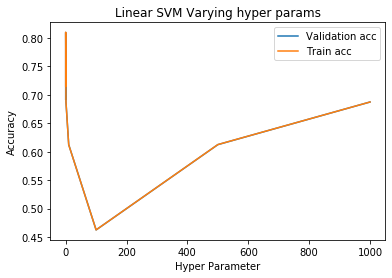

In [30]:
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,500,1000]
plot_hyperparam_vs_metric(alpha,cv_acc,train_acc)

In [31]:
#getting the optimal parameter
optimal_h_l1 = opt_h
acc_l1 = max(cv_acc)
print(optimal_h_l1,acc_l1)

0.001 0.8094462540716613


In [32]:
train_acc,cv_acc,opt_h = LSVM_tune(X,Y,'l2')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


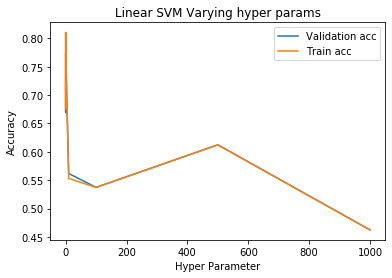

In [33]:
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,500,1000]
plot_hyperparam_vs_metric(alpha,cv_acc,train_acc)

In [34]:
optimal_h_l2 = opt_h
acc_l2 = max(cv_acc)
print(optimal_h_l2,acc_l2)

0.01 0.8094462540716613


In [35]:
#retrain on full data
clf = SGDClassifier(loss = 'hinge',penalty='l2',alpha = optimal_h_l2)
    
#Fit the model
clf.fit(X,Y)
    
#Compute accuracy on the test set
pred = clf.predict(test_data)

In [36]:
def mapp(x):
      if x == 1:
        return 'Y'
      else:
        return 'N'
mapped_pred = np.arange(len(pred)).astype('str')
i = 0
while (i < len(pred)):
    mapped_pred[i] = mapp(pred[i])
    i = i+1

In [39]:
d = {'Loan_ID': Loan_ID , 'Loan_Status': mapped_pred}
upload_LSVM = pd.DataFrame(d)
upload_LSVM.to_csv("upload_LSVM.csv",index=False)